### Nuvem de palavras do Twitter
### 100 tweets coletados em 20/11/2019 às 21:00hs

In [1]:
import tweepy
from twython import Twython
import re
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt


# Preencha a seguir com as suas chaves de API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

### Implementação

In [2]:
# Validação de tokens de acesso
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [30]:
tweets = tweepy.Cursor(api.search,q="#globolixo -filter:retweets",
                           lang="pt", since="2019-11-03").items(100)

In [31]:
raw_tweets = []
for tweet in tweets:
    raw_tweets.append(tweet.text)
    
    
    print(raw_tweets) 

['@OBQDC Que vista a #GloboLixo pqp']
['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo']
['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo']
['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk']
['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo']
['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta diz

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

['@OBQDC Que vista a #GloboLixo pqp', '@jornalnacional Sai pra lá #GloboLixo', '@g1 Jornalismo canalha! #GloboLixo', 'Agr que me peguei pensando que eu fico falando #globolixo mas n perco a Maria da paz nenhum dia kkkkkk', '@Reloaded_Mila Só falta dizerem que foi a Laurinha.\n\n#GloboLixo', '@JornalOGlobo Como dizem os bolsominions... #GloboLixo', '@CBNoficial E por essa e outras que esse caso esta dificil de ser solucionado...muitas ilaçoes , imaginaçoes e reva… https://t.co/H2ftke5Wmc', '@RaquelBlak É puro LIXO #GloboLixo', 'O cara vai na afiliada da #GLOBOLIXO no Ceará e esculhamba a #REDEESGOTODETELEVISAO, e o apresentador não sabe o qu… https://t.co/SrLeVS89eW', '@allantercalivre Nunca comemorei a demissão de ninguém, mas neste caso é sinal da derrocada de uma das maiores inim… https://t.co/ezbiCw59QG', '@allantercalivre Vamos ajudar a #globolixo  então   AUDIÊNCIA ZERO', '@GeorgMarques @KennedyAlencar A #GloboLixo petista? Ah, tá ...', '@gugachacra #GloboLixo No seu local de trab

In [32]:
raw_string = ''.join(s for s in raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [33]:
STOPWORDS = ["da", "meu", "em", "você", "de", "ao", "os",'primeira', '&gt;', 'um', 'minha', 'conseguiu', 'foi', 'amigo',
            'teve', 'todas', 'jeito', 'nenhum', 'dificuldade','as', 
             'vc', 'ou', 'mais', 'tive', 'com', 'materias', 'para', 'qualquer',
            'Qqer', 'não', 'gostou', 'de', 'das', 'antiga', 'e', 'que', 'util...','utilizou',
            '&LT;3', 'a', 'p', 'acho', 'recomenda', 'vai','nessa', 'como', 'sou', 'começar', 'ver', 'do',
             'que', 'ela', 'esse', 'mas']

In [34]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [35]:
words

['obqdc',
 'vista',
 'globolixo',
 'pqpjornalnacional',
 'sai',
 'pra',
 'globolixog',
 'jornalismo',
 'canalha',
 'globolixoagr',
 'peguei',
 'pensando',
 'fico',
 'falando',
 'globolixo',
 'perco',
 'maria',
 'paz',
 'dia',
 'kkkkkkreloadedmila',
 'falta',
 'dizerem',
 'laurinhaglobolixojornaloglobo',
 'dizem',
 'bolsominions',
 'globolixocbnoficial',
 'por',
 'essa',
 'outras',
 'caso',
 'esta',
 'dificil',
 'ser',
 'solucionadomuitas',
 'ilaoes',
 'imaginaoes',
 'reva',
 'puro',
 'lixo',
 'globolixoo',
 'cara',
 'afiliada',
 'globolixo',
 'cear',
 'esculhamba',
 'redeesgotodetelevisao',
 'apresentador',
 'sabe',
 'nunca',
 'comemorei',
 'demisso',
 'ningum',
 'neste',
 'caso',
 'sinal',
 'derrocada',
 'uma',
 'maiores',
 'inim',
 'vamos',
 'ajudar',
 'globolixo',
 'ento',
 'audincia',
 'zerogeorgmarques',
 'kennedyalencar',
 'globolixo',
 'petista',
 'gugachacra',
 'globolixo',
 'seu',
 'local',
 'trabalho',
 'tem',
 'metade',
 'negros',
 'trabalhando',
 'neh',
 'principalmente',
 

In [36]:
wc = WordCloud(background_color="black", max_words=400, width=1600, height=800,)
clean_string = ','.join(words)
wc.generate(clean_string)

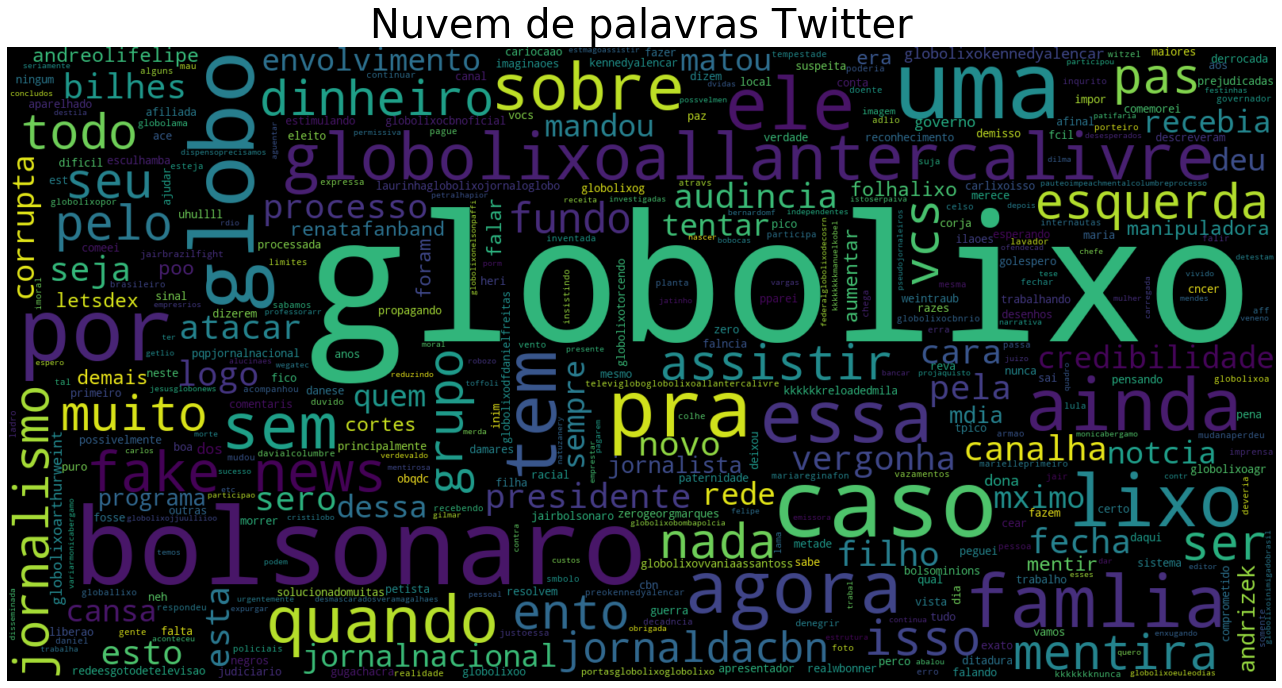

In [37]:
f = plt.figure(figsize=(50,50))

f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Nuvem de palavras Twitter', size=40)
plt.axis("off")
plt.show()